Question 1.

The equation: Yi = β0 + β1xi + εi where εi ~ N(0,σ)

The simple linear regression model describes the relationship between two numeric variables. 

xi = predictor variable, which is independent
yi = outcome variable, which is dependent on xi. 
The model assumes the relationship between the two is linear, so the changes in one is proportional to the other. But, there is always variability that is accounted for with the error term (ε), which is assumed to have a normal distribution with mean = 0 and std = σ. 
β0 = intercept coefficient, which is the expected averge value of Yi when xi = 0.
β1 = slope coefficent, which is the average change in Yi for every one unit increase in xi. 

They combine to form a sample because of the linear relationship between Yi and xi, and normally distributed error term.

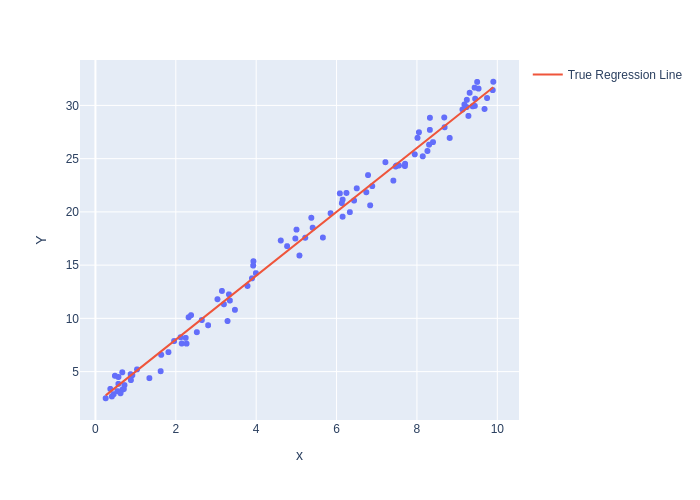

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
import plotly.express as px

# Set the sample size
n = 100

# Generate predictor variable values
x = stats.uniform.rvs(loc=0, scale=10, size=n)

# Set the intercept and slope coefficients
beta0 = 2
beta1 = 3

# Set the standard deviation of the error term
sigma = 1

# Generate the error term from a normal distribution
epsilon = stats.norm.rvs(loc=0, scale=sigma, size=n)

# Calculate the outcome variable using the simple linear regression equation
Y = beta0 + beta1 * x + epsilon

# Create a pandas DataFrame
df = pd.DataFrame({'x': x, 'Y': Y})

# Visualize the data and the true regression line
fig = px.scatter(df, x='x', y='Y')
fig.add_scatter(x=x, y=beta0 + beta1 * x, mode='lines', name='True Regression Line')
fig.show(renderer = "png")

Question 2.

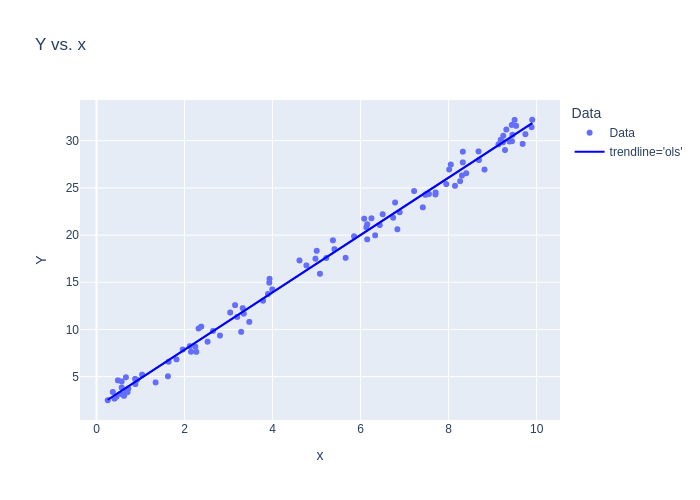

In [15]:
import statsmodels.formula.api as smf  # This library provides functions for specifying and fitting various statistical models, including Ordinary Least Squares (OLS) regression and other linear models.
import plotly.express as px  # this is a plotting library

# Specifies an Ordinary Least Squares (OLS) regression model where Y is the dependent variable, and x is the independent variable. 
# This step sets up the model but does not fit it to the data.
model_data_specification = smf.ols("Y~x", data=df) 

# Fits the specified OLS model to the data in df, estimating the parameters (slope and intercept) based on the data.
fitted_model = model_data_specification.fit() 

fitted_model.summary()  # Provides a detailed summary of the regression results, including statistics like R-squared, p-values, confidence intervals, and the coefficients of the model.
fitted_model.summary().tables[1]  # Extracts only the table containing the estimated coefficients, their standard errors, t-values, and p-values.
fitted_model.params  # Shows the estimated coefficients (parameters) of the regression model, specifically the intercept and the slope of Y with respect to x.
fitted_model.params.values  # Displays the parameter estimates as a simple array or list of values without their labels.
fitted_model.rsquared  # Provides the R-squared value, which measures the proportion of variance in Y that is explained by x. It is a measure of the model's goodness of fit.

df['Data'] = 'Data' # Adds a new column to df named 'Data' with all entries set to 'Data', to force Plotly to include the scatter points in the legend.
fig = px.scatter(df, x='x', y='Y', color='Data', 
                 trendline='ols', title='Y vs. x')
# The trendline='ols' argument adds an Ordinary Least Squares (OLS) trendline to the scatter plot, visualizing the linear relationship between x and Y.

# This is essentially what above `trendline='ols'` does
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")
# Manually adds the fitted OLS trendline to the figure, using the fitted values from the model (fitted_model.fittedvalues) to plot Y against x.

fig.show(renderer="png") 


Question 3.

The true regression line is generated with the equation Y = beta0 + beta1 * x, with fixed values of beta0 (intercept) and beta1 (slope). It shows the ideal relationship between x and Y in the population without considering sample variation because we know the exact beta0 and beta1 values. Because this line is based on constant values, it would remain unchanged even if we sampled new data points from the population.

The fitted ols line is an estimation of relationship between x and Y that accounts for noise from the sample's randomness. Since it is influenced by specific data points sampled, it's subject to sampling variation, which means the line would be slightly different for different samples collected due to the differences in random error values. 

Overall, the true regression line is a fixed theoretical model while the fitted ols line shows how that model is estimated from a sample with randomness accounted for in the error value, which is thus different with every new sample. 

Question 4.

The values in fitted_model.fittedvalues are derived by applying the linear equation defined coefficents in fitted_model.params. fitted_model.fittedvalues is a series of predicted Y values calculated by substituting each x into the regression equation, using the estimated parameters in fitted_model.params.
These values reflect the best-fit line created from the sample data and provide a set of predicted outcomes based on the observed x values and the estimated regression relationship.

Question 5.

In Ordinary Least Squares (OLS) regression, the chosen line for the fitted model is the one that minimizes the sum of the squared differences (residuals) between observed Y values and the line's predicted Y values for each x. These squared differences measure how far each observed point is from the model’s line.

The method uses squares because squaring the residuals emphasizes larger errors and ensures all residuals are positive so they don't cancel out, providing a true measure of overall fit. By minimizing the sum of these squared residuals, OLS finds the line that best fits the observed data by balancing the total prediction error.

Question 6.

The first expression can be interpreted as "the proportion of variation in (outcome) Y" because it measures the total variance in the data. It's a direct measure of how well the model fits the data. A higher value of R^2 suggests a more accurate model. The third expression captures how well the predicted values from the model align with the observed values of Y. The higher the squared correlation, the better the model fits the data and explains the variation in Y. The fourth expression represents how well the independent variable x alone explains the variation in Y.

Question 7. 

From the example data and analysis provided, the following assumptions of the Simple Linear Regression model might not be fully met:

Linearity: The relationship between fertilizer and crop yield seems approximately linear, but there might be slight curvature, especially at higher levels of fertilizer.
Homoscedasticity: The residuals appear to have increasing or decreasing spread as x increases, indicating heteroscedasticity, violating the assumption of constant variance.
Normality of Residuals: The residuals do not appear to be approximately normally distributed since it is showing skewness and thus violates the normality assumption.

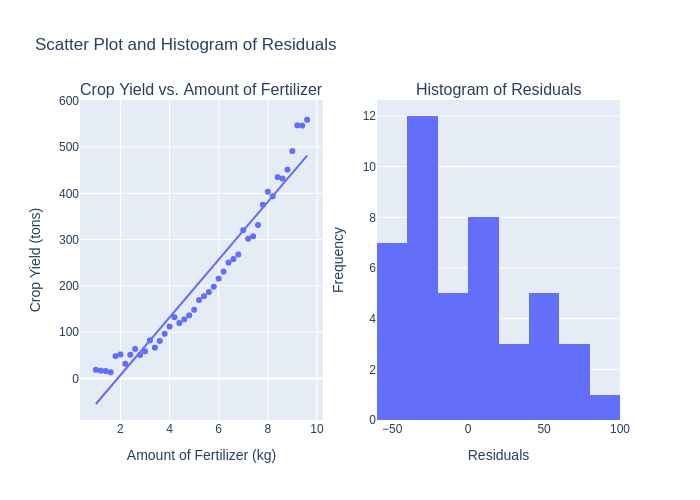

In [36]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer = "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Week of Nov04 

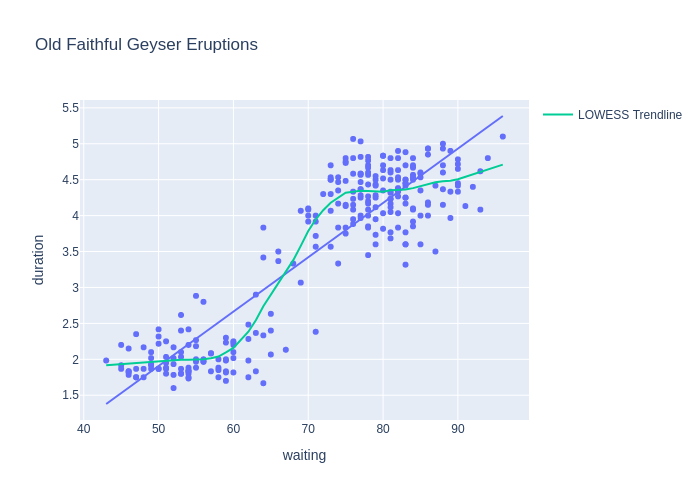

In [16]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer= "png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [6]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        15:22:07   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Question 8. 
A null hypothesis of "no linear association(on average)" will have the slope of the regression line (beta1) be zero. This means there is no relationship between the predictor and outcome variables. 

The code in this dataset shows a slope of the linear regression that is greater than 0. By inspection, the slope is around 0.06, which is greater than 0. This is confirmed with the p-value of 0 which shows very strong evidence against the null hypothesis. Therefore, we have evidence to reject the null hypothesis. So, there is probably a relationship between the predictor and outcome variables. 

Question 9. 

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


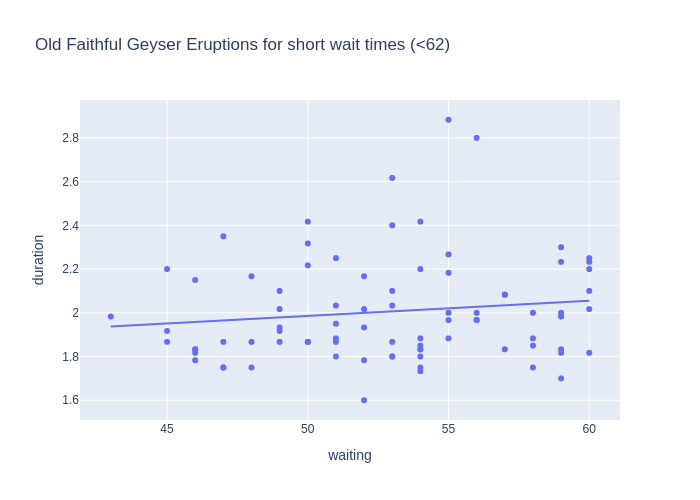

In [17]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The null hypothesis is that there is no linear association between waiting and duration, which means the slope is 0. In this dataset of the short wait times, the p-value is 0.238, which when compared to the chart, shows that there is weak evidence against the null hypothesis. Therefore we fail to reject the null hypothesis and it is likely that there is no correlation between waiting and duration times. 

Question 10. 


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.3520,0.476,7.049,0.000,2.413,4.291
waiting,0.0122,0.006,2.091,0.038,0.001,0.024


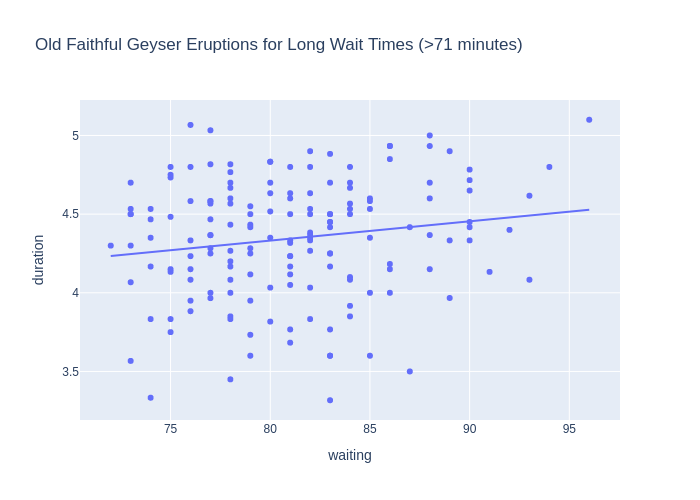

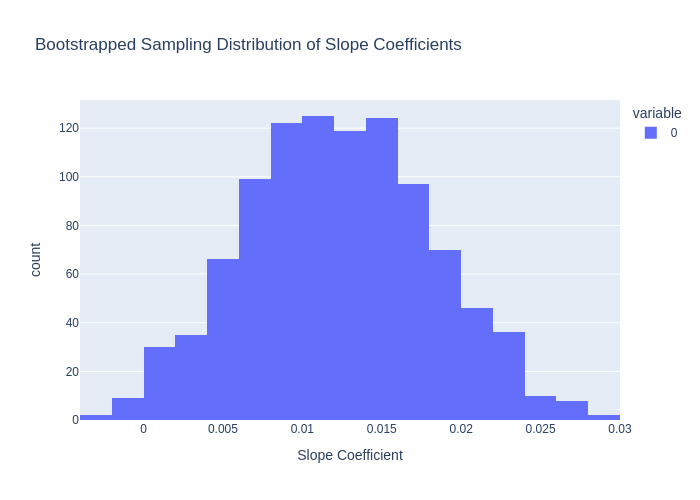

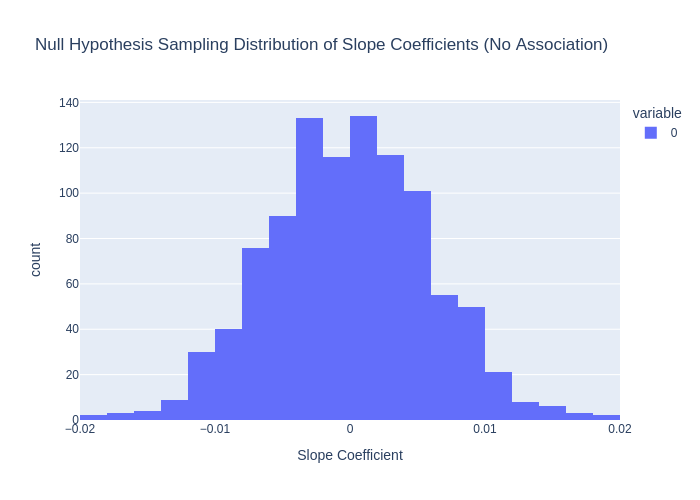

95% Bootstrapped Confidence Interval for Slope: [0.00091411 0.02364143]
Simulated p-value: 0.036
OLS p-value from summary table: 0.038135755338567744


In [29]:
import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf
from scipy import stats

old_faithful = sns.load_dataset('geyser') 

# Set parameters for the null hypothesis simulation
beta0 = 1.65
beta1 = 0
sigma = 0.37

# Filter long wait times
long_wait_limit = 71
long_wait = old_faithful['waiting'] > long_wait_limit
long_wait_data = old_faithful[long_wait]

# Step 1: Display OLS summary for long wait data
model_long_wait = smf.ols('duration ~ waiting', data=long_wait_data).fit()
display(model_long_wait.summary().tables[1])

# Step 2: Plot scatter plot with trendline
fig = px.scatter(long_wait_data, x='waiting', y='duration', 
                 title=f"Old Faithful Geyser Eruptions for Long Wait Times (>{long_wait_limit} minutes)", 
                 trendline='ols')
fig.show(renderer="png")  # for submissions

# Step 3: Bootstrapping to collect slope coefficients
n_bootstraps = 1000
bootstrapped_slope_coefficients = []

for _ in range(n_bootstraps):
    bootstrap_sample = long_wait_data.sample(n=len(long_wait_data), replace=True)
    bootstrap_model = smf.ols('duration ~ waiting', data=bootstrap_sample).fit()
    bootstrapped_slope_coefficients.append(bootstrap_model.params['waiting'])

# Visualize bootstrapped slope coefficients
fig_bootstrap = px.histogram(bootstrapped_slope_coefficients, nbins=30, 
                             title="Bootstrapped Sampling Distribution of Slope Coefficients",
                             labels={'value': 'Slope Coefficient'})
fig_bootstrap.show(renderer="png")  # for submissions

# Step 4: Null hypothesis simulations (beta1 = 0)
simulated_slope_coefficients = []

for _ in range(n_bootstraps):
    # Simulate data under the null hypothesis (no association)
    simulated_durations = beta0 + beta1 * long_wait_data['waiting'] + stats.norm(0, sigma).rvs(len(long_wait_data))
    long_wait_simulation = long_wait_data.copy()
    long_wait_simulation['duration'] = simulated_durations
    
    # Fit model and collect slope coefficient
    simulated_model = smf.ols('duration ~ waiting', data=long_wait_simulation).fit()
    simulated_slope_coefficients.append(simulated_model.params['waiting'])

# Visualize null hypothesis slope coefficients
fig_null_sim = px.histogram(simulated_slope_coefficients, nbins=30, 
                            title="Null Hypothesis Sampling Distribution of Slope Coefficients (No Association)",
                            labels={'value': 'Slope Coefficient'})
fig_null_sim.show(renderer="png")  # for submissions

# Step 5: Report 95% Bootstrapped CI and Simulated p-value
bootstrapped_ci = np.quantile(bootstrapped_slope_coefficients, [0.025, 0.975])
print(f"95% Bootstrapped Confidence Interval for Slope: {bootstrapped_ci}")

# Calculate p-value from null hypothesis simulation
observed_slope = model_long_wait.params['waiting']
simulated_p_value = (np.abs(simulated_slope_coefficients) >= np.abs(observed_slope)).mean()
print(f"Simulated p-value: {simulated_p_value}")

# Step 6: Compare simulated p-value with the OLS p-value from the original model
ols_p_value = model_long_wait.pvalues['waiting']
print(f"OLS p-value from summary table: {ols_p_value}")


Question 11. 

For this model specification, the indicator variable allows the intercept (baseline eruption duration) to differ between short and long waits. This means the model can account for an overall shift in eruption duration based on wait category. Also, unlike seperating the data in previous models, where each model (short and long) has its own slope, here the slope is shared. This assumes the effect of each additional minute of waiting is similar regardless of whether the wait is categorized as short or long.

The evidence against a null hypothesis of "no difference between groups on average" for the new indicator variable based model would be a slope that is not equal to 0. The p-value associated with C(kind)[T.long] tests whether the observed difference in duration has enought evidence to reject the null hypothesis, meaning there is a difference betweeen groups on average. 

Question 12.

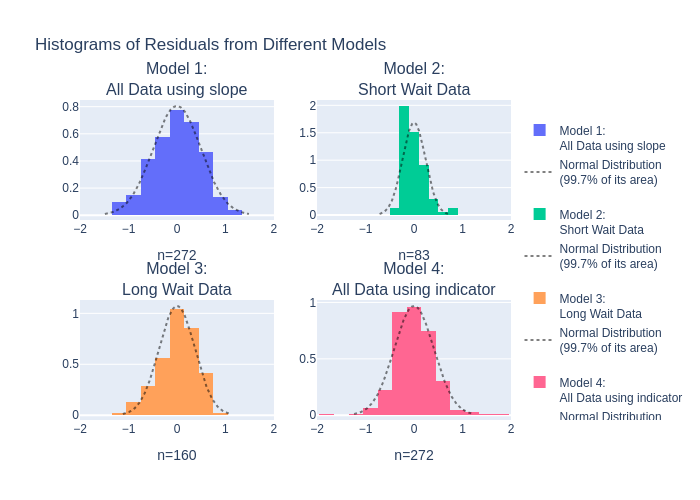

In [32]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

old_faithful = sns.load_dataset('geyser')

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

The best support for the assumption of normal error terms would likely come from Model 1 because its residuals appear normally distributed due to the larger data set and the continuous predictor variable. Models whose residual histograms are skewed like models 2 and 3, or have clustering like model 4, suggest that the residuals are not normally distributed.

Question 13.

In [33]:
import numpy as np

# Define observed mean difference in duration between "short" and "long" wait times
observed_difference = old_faithful[old_faithful['kind'] == 'long']['duration'].mean() - \
                      old_faithful[old_faithful['kind'] == 'short']['duration'].mean()

# Set up parameters for permutation test
num_permutations = 1000
permuted_differences = []

for _ in range(num_permutations):
    # Shuffle labels
    shuffled_labels = np.random.permutation(old_faithful['kind'])
    
    # Assign shuffled labels to the dataset
    old_faithful['shuffled_kind'] = shuffled_labels
    
    # Calculate mean difference with shuffled labels
    permuted_difference = old_faithful[old_faithful['shuffled_kind'] == 'long']['duration'].mean() - \
                          old_faithful[old_faithful['shuffled_kind'] == 'short']['duration'].mean()
    
    # Collect the permuted mean difference
    permuted_differences.append(permuted_difference)

# Calculate the p-value as the proportion of permuted differences more extreme than the observed difference
p_value = np.mean(np.abs(permuted_differences) >= np.abs(observed_difference))

print(f"Observed Mean Difference: {observed_difference}")
print(f"P-Value from Permutation Test: {p_value}")


Observed Mean Difference: 2.2036002325581396
P-Value from Permutation Test: 0.0


In [34]:
# Set up parameters for bootstrap
num_bootstrap_samples = 1000
bootstrapped_mean_differences = []

# Bootstrap sampling
for _ in range(num_bootstrap_samples):
    # Resample "short" and "long" wait time groups with replacement
    short_sample = old_faithful[old_faithful['kind'] == 'short']['duration'].sample(frac=1, replace=True)
    long_sample = old_faithful[old_faithful['kind'] == 'long']['duration'].sample(frac=1, replace=True)
    
    # Calculate mean difference between resampled groups
    mean_difference = long_sample.mean() - short_sample.mean()
    bootstrapped_mean_differences.append(mean_difference)

# Calculate 95% confidence interval from bootstrap sample
confidence_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])

print(f"95% Bootstrap Confidence Interval for Difference in Means: {confidence_interval}")


95% Bootstrap Confidence Interval for Difference in Means: [2.10056448 2.30260256]


a. 
The sampling approach for permutation testing: "shuffling" the labels between the two groups many times and creates a new "permutation sample" that represents a scenario under the null hypothesis (i.e., no real difference between the two groups). For each permutation, we calculate the mean difference in duration between the newly shuffled "short" and "long" groups. This collection of mean differences forms the sampling distribution under the null hypothesis.

The sampling approach for bootstrapping: For each group, we take random samples with replacement from the original data to create "bootstrapped samples." Each bootstrapped sample maintains the group label, and within each, we calculate the mean. Then, for each pair of bootstrapped samples (one for each group), we calculate the difference in means. This collection of mean differences represents the bootstrap sampling distribution of the difference between means.

b. 
Both the permutation and bootstrap approaches, like the indicator model with random sampling, rely on random sampling to create distributions used for testing or estimating the difference between groups.
The indicator variable model is a regression model that directly estimates the effect of being in the "long" group compared to the "short" group, as expressed by the coefficient for the indicator variable.The permutation test evaluates whether a difference in means could occur by random chance under the null hypothesis, while the bootstrap method provides a confidence interval for the difference in group means, assessing the range of plausible differences. 
Permutation and bootstrap are flexible, non-parametric methods useful when data does not meet normality assumptions or where we want to avoid assuming a specific distribution.
The indicator variable model offers a structured, model-based approach to quantify the effect of "long" wait times on duration, assuming a normal distribution of errors and linearity.

Question 14. Mostly

chatGPT link: https://chatgpt.com/share/672542fb-f02c-8007-b124-ae52c762631e and summary: In this conversation, we discussed several aspects of statistical modeling and analysis using the Simple Linear Regression (SLR) model, particularly in the context of the Old Faithful geyser data and a new example involving fertilizer usage and crop yield.

Simple Linear Regression Assumptions:

We examined the assumptions of the SLR model (linearity, homoscedasticity, normality of residuals, and independence of errors), noting potential issues with the example data.
For the Old Faithful geyser data, the linearity assumption seemed reasonable, but potential violations in homoscedasticity or normality of residuals were flagged based on residual plots.
Fitting Models and Interpreting Results:

We explored how R-squared, fitted model values, and correlation coefficients provide insights into the strength of the linear relationship between the independent variable (x) and the dependent variable (Y).
Permutation and Bootstrap Methods:

Two hypothesis testing approaches—permutation testing and bootstrap confidence intervals—were discussed to assess differences between "short" and "long" waiting times in the Old Faithful dataset. We explored how these methods differ from standard linear regression models.
Model Assumptions in the Fertilizer-Crop Yield Example:

A new example involving fertilizer and crop yield highlighted potential violations of SLR assumptions, particularly the possibility of non-linearity, heteroscedasticity, and non-normality of residuals.
In summary, we reviewed how to assess and test the assumptions underlying Simple Linear Regression and interpreted results using multiple statistical methods, pointing out the importance of model diagnostics to ensure valid conclusions.